# Data Visualization Project - Udacity - Prosper Loan Data Exploration

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 

%matplotlib inline

## Dictionary

I have downloaded manually from the following link that is hosted by Udacity. This is the dictionary for the Loan Data dataset.

In [56]:
dictionary = pd.read_csv('prosperloan_dic.csv')
dictionary

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the..."
1,ListingNumber,The number that uniquely identifies the listin...
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the tim...
4,Term,The length of the loan expressed in months.
...,...,...
76,PercentFunded,Percent the listing was funded.
77,Recommendations,Number of recommendations the borrower had at ...
78,InvestmentFromFriendsCount,Number of friends that made an investment in t...
79,InvestmentFromFriendsAmount,Dollar amount of investments that were made by...


# Wrangling

In [57]:
impt = requests.get('https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv', allow_redirects=True)
open('prosperloan_data.csv', 'wb').write(impt.content)
df = pd.read_csv('prosperloan_data.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [59]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [60]:
#Since we have a massive amount of columns, I'll be selecting a few ones to continue the analysis
columns = ['Term','LoanStatus','BorrowerRate','ProsperRating (Alpha)','ListingCategory (numeric)','EmploymentStatus','DelinquenciesLast7Years','StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationDate','Investors','Recommendations']
df = df[columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   DelinquenciesLast7Years    112947 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   LoanOriginalAmount         113937 non-null  int64  
 9   LoanOriginationDate        113937 non-null  object 
 10  Investors                  113937 non-null  int64  
 11  Recommendations            113937 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 10.4+ MB


In [61]:
df.head()

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,Investors,Recommendations
0,36,Completed,0.1580,NaN,0,Self-employed,4.0,3083.333333,9425,2007-09-12 00:00:00,258,0
1,36,Current,0.0920,A,2,Employed,0.0,6125.000000,10000,2014-03-03 00:00:00,1,0
2,36,Completed,0.2750,NaN,0,Not available,0.0,2083.333333,3001,2007-01-17 00:00:00,41,0
3,36,Current,0.0974,A,16,Employed,14.0,2875.000000,10000,2012-11-01 00:00:00,158,0
4,36,Current,0.2085,D,2,Employed,0.0,9583.333333,15000,2013-09-20 00:00:00,20,0


**Issues Found**
1. Prosper Rating columns has too many null values
2. LoanOriginationDate must be converted to type date
3. Columns names not adequate for coding

In [62]:
#To deal with the null values in ProsperRating column we deal with it in different kinds of approach. In order to keep it simple I'll be just dropping the missing rows

df_c = df.copy()
df_c = df_c[df_c['ProsperRating (Alpha)'].isna() == False].reset_index()

#Changing column type
df_c['LoanOriginationDate'] = pd.to_datetime(df_c['LoanOriginationDate'])

df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   Term                       84853 non-null  int64         
 2   LoanStatus                 84853 non-null  object        
 3   BorrowerRate               84853 non-null  float64       
 4   ProsperRating (Alpha)      84853 non-null  object        
 5   ListingCategory (numeric)  84853 non-null  int64         
 6   EmploymentStatus           84853 non-null  object        
 7   DelinquenciesLast7Years    84853 non-null  float64       
 8   StatedMonthlyIncome        84853 non-null  float64       
 9   LoanOriginalAmount         84853 non-null  int64         
 10  LoanOriginationDate        84853 non-null  datetime64[ns]
 11  Investors                  84853 non-null  int64         
 12  Reco

Transformations

In [85]:
#I'm just adjusting the form of data
def loan_transform(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    if row['LoanStatus'] == 'Current':
        return 'Active'
    if row['LoanStatus'] == 'Completed':
        return 'Completed'
    if row['LoanStatus'] == 'FinalPaymentInProgress':
        return 'Active'
    else:
        return 'Late'
    
df_c['LoanStatus_t'] = df_c.apply(loan_transform, axis=1)
df_c['LoanStatus_t'].value_counts()

Active       56781
Completed    19664
Defaulted     5336
Late          3072
Name: LoanStatus_t, dtype: int64

In [89]:
ax = {1: 'Debt', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Others'}

def reduce_categorie(row):
    loan_transf = row['ListingCategory (numeric)']
    if  loan_transf in ax:
        return ax[loan_transf]
    else:
        return ax[7]
    
df_c['ListingCategory'] = df_c.apply(reduce_categorie, axis=1)
df_c['ListingCategory'].value_counts()

Debt                53180
Others              17337
Home Improvement     6801
Business             5298
Auto                 2237
Name: ListingCategory, dtype: int64

## Main features of this dataset

> Figre out what features can be used for credit default prediction and the features with the biggest correlations with prosper credit rating.

## What features will help support your investigation into your feature of interest?

> Before doing the check I believe that ProsperRating, Listing Category and EmploymentStatus will have the biggest correlations with default's probability and credit rating.

# Univariate Exploration

## Loan Status

In [64]:
df_c[['LoanStatus','Term']].groupby('LoanStatus').count()/df_c['Term'].count()

,Term
LoanStatus,
Chargedoff,0.062885
Completed,0.231742
Current,0.666753
Defaulted,0.011844
FinalPaymentInProgress,0.002416
Past Due (1-15 days),0.009499
Past Due (16-30 days),0.003123
Past Due (31-60 days),0.004278
Past Due (61-90 days),0.003689


[]

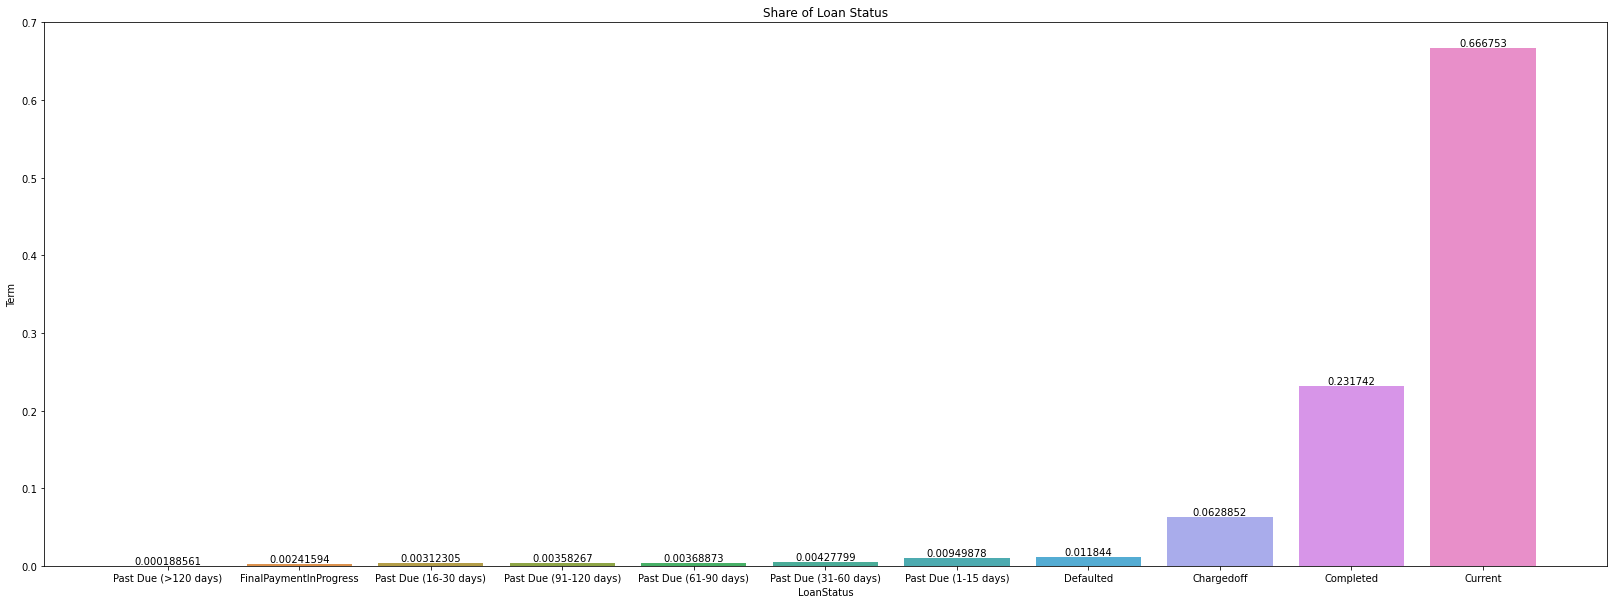

In [65]:
 graf1 = df_c[['LoanStatus','Term']].groupby('LoanStatus').count()/df_c['Term'].count()
 
 fig = plt.figure(figsize=(28,10))

 ax = sns.barplot(x= 'LoanStatus', y = 'Term', data=graf1.reset_index().sort_values('Term'))
 ax.bar_label(ax.containers[0])
 plt.title('Share of Loan Status')
 plt.plot()

> * Most of the loans in this dataset is either Current, Completed or Chargeoff. 
> * Past due loans are split throughout several groups being over 120 days the category with less share
> * The risk of a loan is it's default. It seems that the loan dynamic is healthy due to the share of completed loans

## Monthly Income

[]

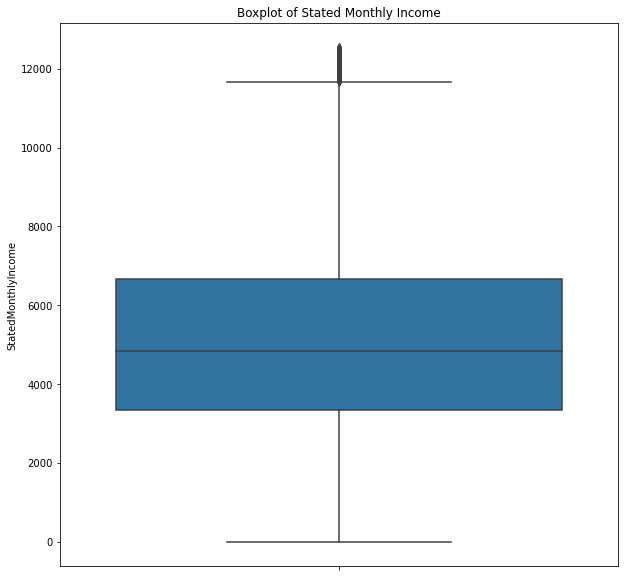

In [67]:
 #graf1 = df_c[['LoanStatus','Term']].groupby('LoanStatus').count()/df_c['Term'].count()
 
Q1 = df_c['StatedMonthlyIncome'].quantile(0.25)
Q3 = df_c['StatedMonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_c['StatedMonthlyIncome'] >= Q1 - 1.5 * IQR) & (df_c['StatedMonthlyIncome'] <= Q3 + 1.5 *IQR)

fig = plt.figure(figsize=(10,10))

ax = sns.boxplot(y='StatedMonthlyIncome', data=df_c.loc[filter])
#ax.bar_label(ax.containers[0])
plt.title('Boxplot of Stated Monthly Income')
plt.plot()

According to the boxplot it seems that our data is skewed to the right. A better visualization to see where exactly most of our data falls would a histogram.

[]

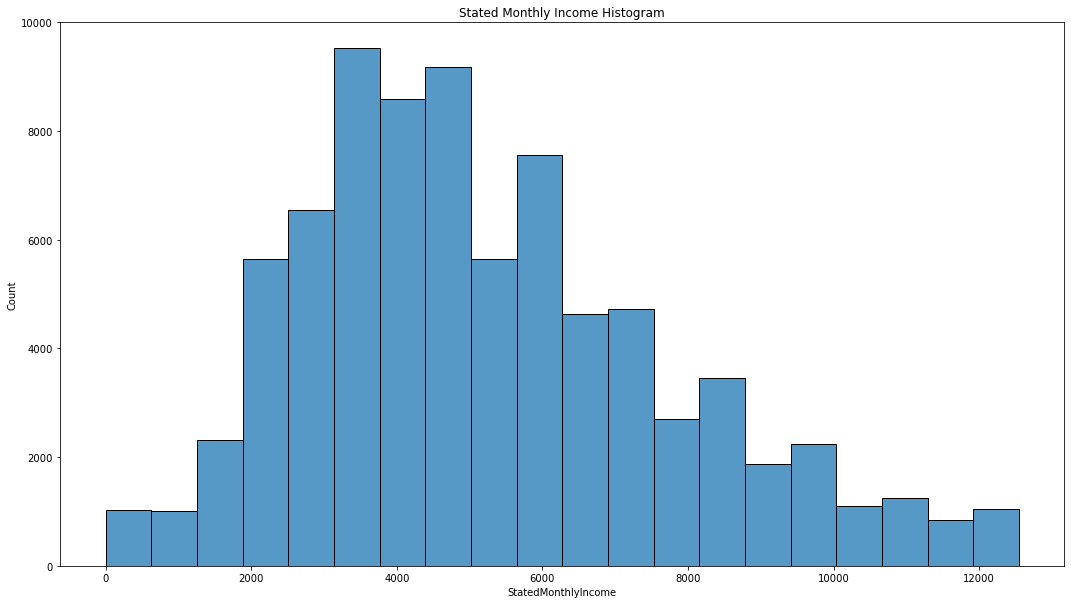

In [68]:
 #graf1 = df_c[['LoanStatus','Term']].groupby('LoanStatus').count()/df_c['Term'].count()
 
fig = plt.figure(figsize=(18,10))
ax = sns.histplot(x='StatedMonthlyIncome', data=df_c.loc[filter], bins=20)
#ax.bar_label(ax.containers[0])
plt.title('Stated Monthly Income Histogram')
plt.plot()

In [69]:
print('Mode is {}'.format(df_c.loc[filter]['StatedMonthlyIncome'].mode().values))

Mode is [4166.666667]


Taking a look at our new graph, the histogram, it's possible to have a better view of our data distribution. It seems that most data points falls between 2000 and 6000 Stated Monthly Income.

## Employment Status

[]

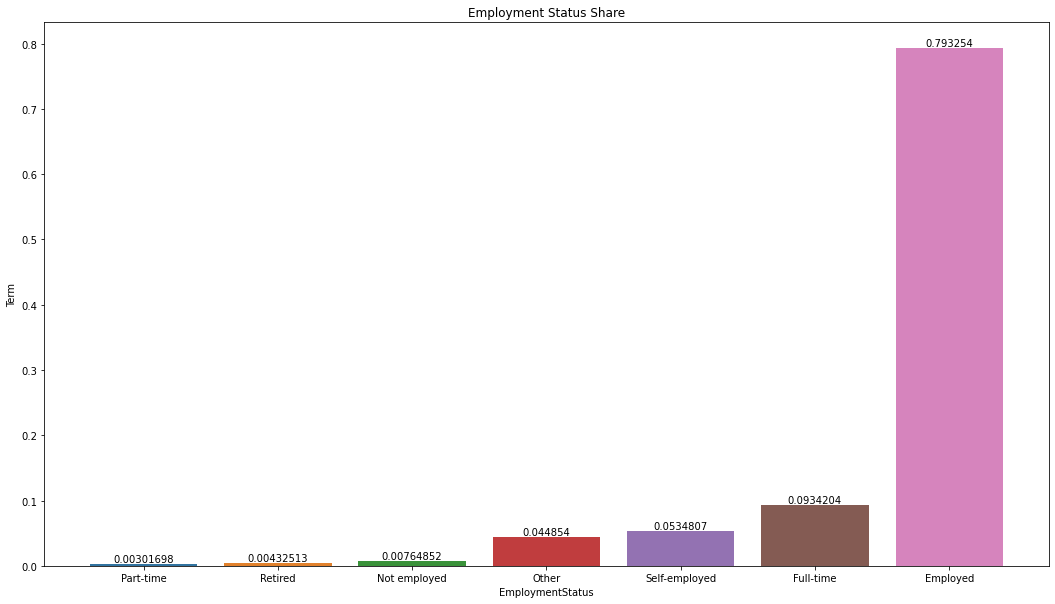

In [70]:
graf1 = df_c[['EmploymentStatus','Term']].groupby('EmploymentStatus').count()/df_c['EmploymentStatus'].count()
 
fig = plt.figure(figsize=(18,10))
ax = sns.barplot(x='EmploymentStatus', y='Term', data=graf1.reset_index().sort_values('Term'))
ax.bar_label(ax.containers[0])
plt.title('Employment Status Share')
plt.plot()

* The biggest group is Employed followed by full-time, self-employed and Other. 
* It seems that this column might be wrongly named. A very small part is considered Retired or not employed, and the rest of the categories are actually types of employments. Therefore despite for retired and not employed, all the others are Employed but with different kinds of employment.

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of stated income is right skewed and it made me need to do a zoom in within the data in order for to be able to actually see the distribution. Almost all borrowers are employed (although the column categorized it wrongly in my opinion since it splits employed by types of employment but still keeps the status 'Employed'). Most of the loans are Current and Completed, and it seems healthy due to small number of past dues and defaults.

## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I had to zoom in within the data in order to visualize the distribution of stated income. 

# Bivariate Exploration

## Prosper Rating and Employment Status

[]

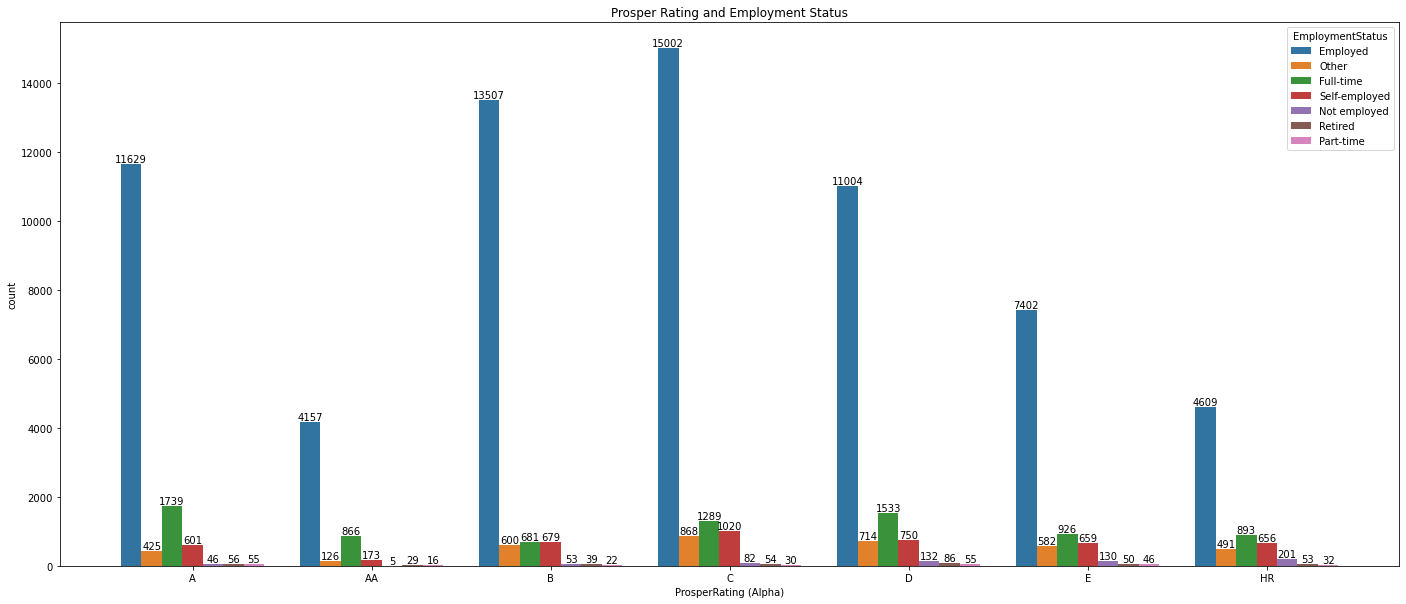

In [72]:
fig = plt.figure(figsize = (24, 10))
ax = sns.countplot(x = 'ProsperRating (Alpha)', data = df_c, order=df_c['ProsperRating (Alpha)'].value_counts().reset_index().sort_values('index')['index'], hue = 'EmploymentStatus')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
ax.bar_label(ax.containers[5])
ax.bar_label(ax.containers[6])
plt.title('Prosper Rating and Employment Status')
plt.plot()

* Lower your rating, bigger the amount of individuals with employment status Not Employed, Self-employed, Retired and Part-Time.

## Loan Status and Loan Amount

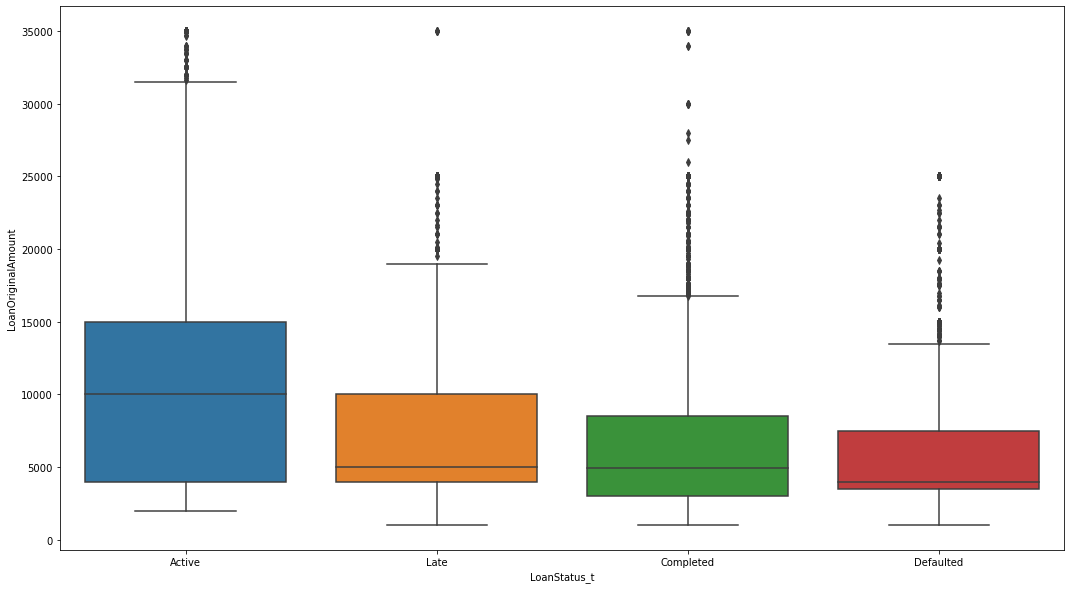

In [86]:
fig = plt.figure(figsize=(18,10))
sns.boxplot(data = df_c, x = 'LoanStatus_t', y = 'LoanOriginalAmount')

* I can't determine a conclusion when it comes to credit health, but we may see that Defaulted category is the one with smaller amount of credit, although Completed debts are the second lowest category. 

## Loan Status and Prosper Rating

[]

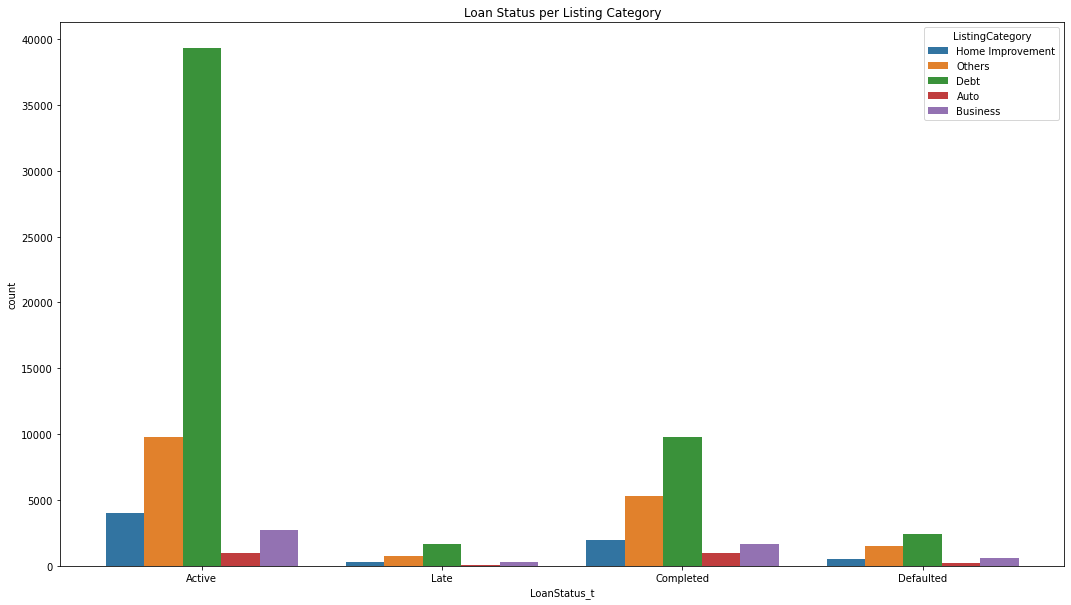

In [108]:
fig = plt.figure(figsize=(18,10))
sns.countplot(data = df_c, x = 'LoanStatus_t', hue = 'ListingCategory')
plt.title('Loan Status per Listing Category')
plt.plot()

* Most prevalent Listing category is Debt - which can be used for multiple purposes, followed by Others which can be a series of other minor kinds of debts categories


## Loan Status per Prosper Rating

[]

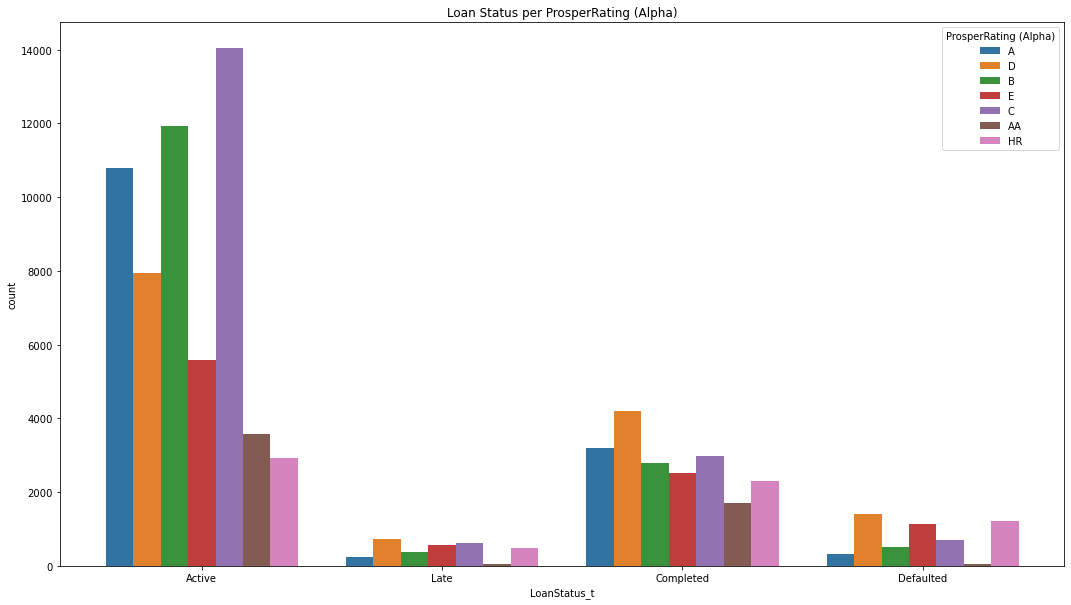

In [112]:
fig = plt.figure(figsize=(18,10))
sns.countplot(data = df_c, x = 'LoanStatus_t', hue = 'ProsperRating (Alpha)')
plt.title('Loan Status per ProsperRating (Alpha)')
plt.plot()

* Prosper Rating D is the most frequent group among Loan Status despite for Active. 
* A and AA being the best rating categories, seems to have the second lowest share in both Default and Late
* It doesnt look like there's an exact correlation between prosper rating and loan status, since the lower rating categories has a good representation in Completed and Active.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Lower your rating, bigger the amount of individuals with employment status Not Employed, Self-employed, Retired and Part-Time. When we talk about the rating correlation with Loan Status, we'll notice that Rating D is the most frequent group among Loan Status despite for Active, A and AA being the best rating categories, seems to have the second lowest share in both Default and Late. However It doesnt look like there's an exact correlation between prosper rating and loan status, since the lower rating categories has a good representation in Completed and Active.

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Prosper Rating D is the most frequent group in Loan Status even among Completed, where it is the one with the highest frequency. This group is composed majoritarily by employed people.

# Multivariate Exploration

## Rating, Loan Status and Loan Amount
--------

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='LoanOriginalAmount'>

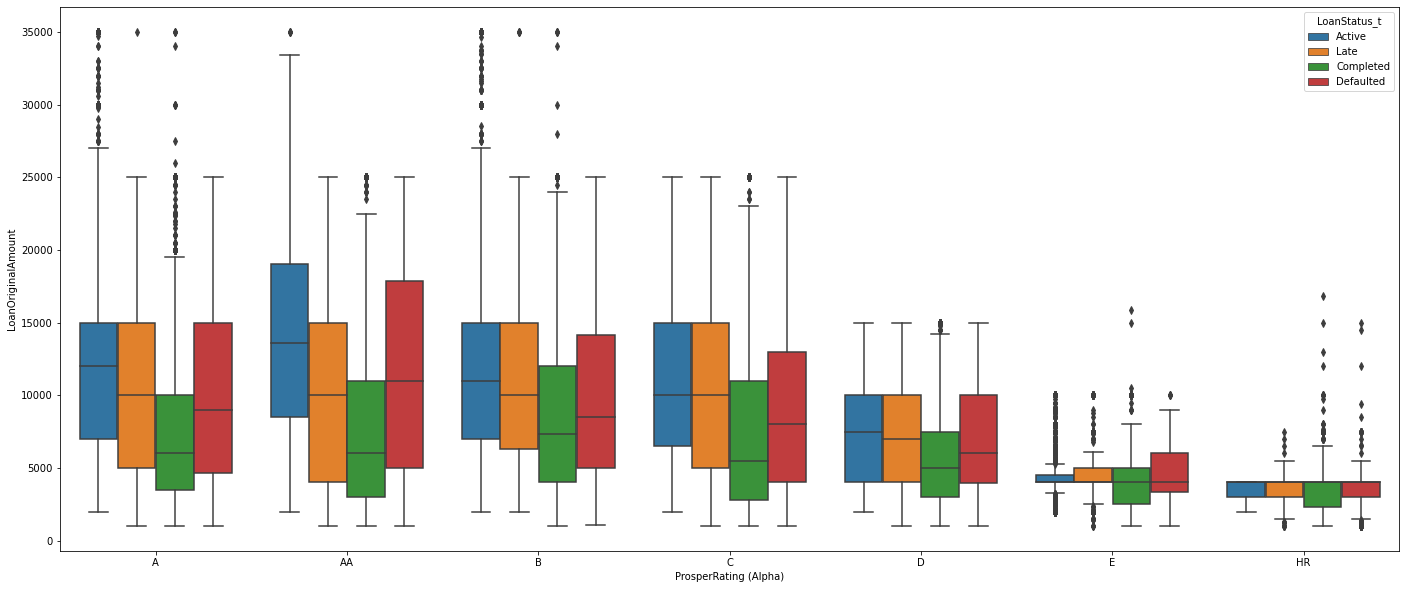

In [120]:
plt.figure(figsize = (24, 10))
sns.boxplot(data=df_c, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus_t', order=df_c['ProsperRating (Alpha)'].value_counts().reset_index().sort_values('index')['index'])

* Credits tends to be lower in Completed status along all prosper ratings
* Despite for A and AA ratings, the amount of credits for Active and Late tends to be similar

## Amount, Listing Category and Loan Status
-------

<AxesSubplot:xlabel='ListingCategory', ylabel='LoanOriginalAmount'>

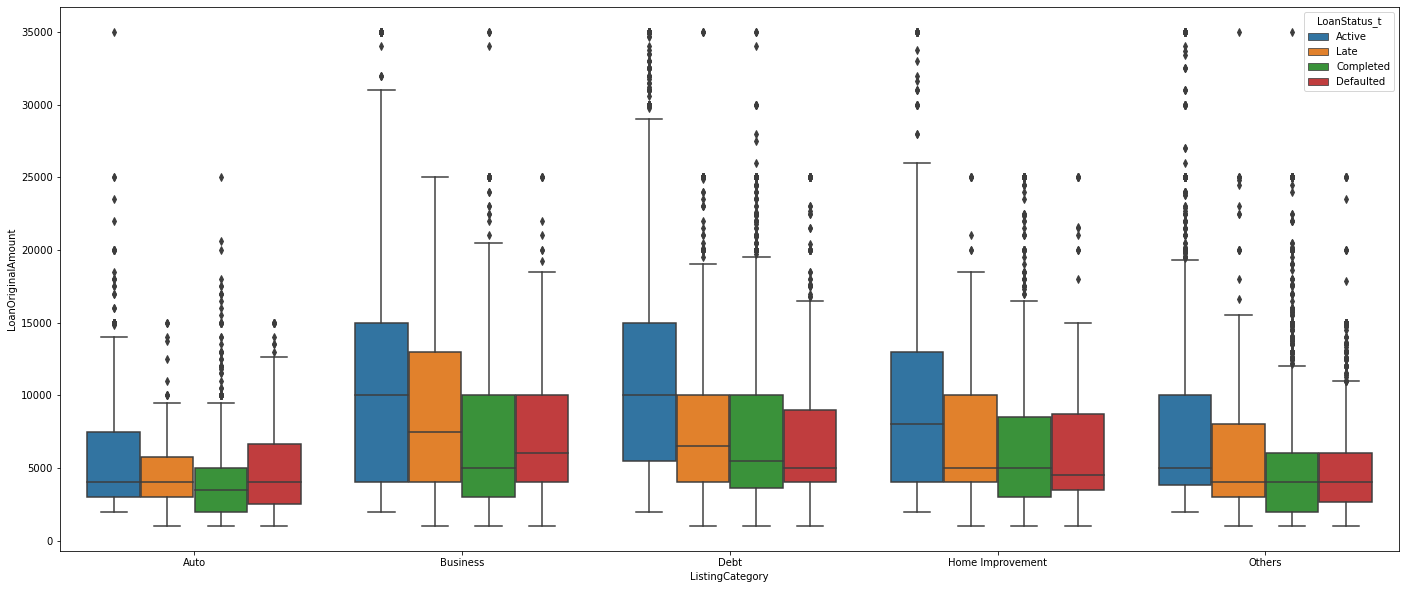

In [142]:
plt.figure(figsize = (24, 10))
sns.boxplot(data=df_c, x='ListingCategory', y='LoanOriginalAmount', hue='LoanStatus_t', order=df_c['ListingCategory'].value_counts().reset_index().sort_values('index')['index'])

* Credits of Active loan status seems to be the biggest along all listing categories
* Except for Active, all other loan status median seems to be similar throughout the listing categories

## Correlations

In [129]:
df_c[['ProsperRating (Alpha)','LoanStatus_t','ListingCategory']].corr().style.background_gradient(cmap='Blues')

,index,Term,BorrowerRate,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,LoanOriginalAmount,Investors,Recommendations
index,1.000000,-0.004632,0.004203,0.002246,-0.002712,0.000109,-0.002719,0.001286,0.007050
Term,-0.004632,1.000000,-0.000118,-0.063268,-0.024476,0.009257,0.339117,0.012550,-0.030338
BorrowerRate,0.004203,-0.000118,1.000000,0.103641,0.142086,-0.093481,-0.413466,-0.242281,-0.009070
ListingCategory (numeric),0.002246,-0.063268,0.103641,1.000000,0.059919,-0.015671,-0.202322,-0.045053,-0.000414
DelinquenciesLast7Years,-0.002712,-0.024476,0.142086,0.059919,1.000000,-0.014966,-0.106634,-0.086997,0.000452
StatedMonthlyIncome,0.000109,0.009257,-0.093481,-0.015671,-0.014966,1.000000,0.182870,0.070351,-0.002858
LoanOriginalAmount,-0.002719,0.339117,-0.413466,-0.202322,-0.106634,0.182870,1.000000,0.319235,-0.027913
Investors,0.001286,0.012550,-0.242281,-0.045053,-0.086997,0.070351,0.319235,1.000000,0.034201
Recommendations,0.007050,-0.030338,-0.009070,-0.000414,0.000452,-0.002858,-0.027913,0.034201,1.000000


* Looking for this correlation table, there is not variable match where we have at least a slightly strong correlation (>50 or <-50)

In [141]:
df_cor = df_c.copy()

def p_cor(row):
    if row['ProsperRating (Alpha)'] == 'AA':
        return 1
    if row['ProsperRating (Alpha)'] == 'A':
        return 2
    if row['ProsperRating (Alpha)'] == 'B':
        return 3
    if row['ProsperRating (Alpha)'] == 'C':
        return 4
    if row['ProsperRating (Alpha)'] == 'D':
        return 5
    if row['ProsperRating (Alpha)'] == 'E':
        return 6
    else:
        return 7

def ls_cor(row):
    if row['LoanStatus_t'] == 'Active':
        return 1
    if row['LoanStatus_t'] == 'Completed':
        return 2
    if row['LoanStatus_t'] == 'Late':
        return 3
    else:
        return 4
    
df_cor['ProsperRating_num'] = df_cor.apply(p_cor, axis=1)
df_cor['LoanStatus_num'] = df_cor.apply(ls_cor, axis=1)
df_cor['ListingCategory_num'] = df_cor['ListingCategory (numeric)']

df_cor[['ProsperRating_num','LoanStatus_num','ListingCategory_num','LoanOriginalAmount']].corr().style.background_gradient(cmap='Blues')

,ProsperRating_num,LoanStatus_num,ListingCategory_num,LoanOriginalAmount
ProsperRating_num,1.000000,0.231763,0.094474,-0.428557
LoanStatus_num,0.231763,1.000000,0.070818,-0.240187
ListingCategory_num,0.094474,0.070818,1.000000,-0.202322
LoanOriginalAmount,-0.428557,-0.240187,-0.202322,1.000000


* After transforming our categories to numerical equivalents to use the correlation function, we still can't find a strong correlation among them.

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Completed status along all prosper ratings seems to be made up of lower credits. Except for A and AA ratings, all other loan status median seems to be similar. Even after transforming our categories into numerical equivalents to use a correlation function, it didn't show any meaningful results.
Our assumptions were strenghened in the meaning that we know that the majority of defaults comes from lower ratings, however we know as well that the amount of credit taken by lower ratings borrowers is less significant than the ones taken by higher rating, therefore it is more critical for us if a AA rating goes default rather than someone with D rating.

## Were there any interesting or surprising interactions between features?

Finding out that completed loans tends to be lower than all other categories is unexpected.